In [ ]:
#Description: The purpose of this program is to successfully detect breast cancer based off of data using a classification model

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data (4).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [ ]:
#Count the number of rows and columns in the data set
df.shape

(569, 33)

In [ ]:
#Count of the number of empty values in each column, represented as NaN
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Drop the last column with all missing values, Unamed: 32
df = df.dropna(axis=1)

In [ ]:
#Get the new shape of the dataset 
df.shape

(569, 32)

In [ ]:
#Get the count of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

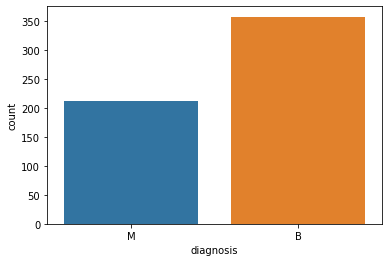

In [ ]:
#Visualise the count
sns.countplot(df["diagnosis"], label = "count")

In [ ]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Enode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y  = LabelEncoder()
df.iloc[:, 1] = labelencoder_Y.fit_transform(df.iloc[:, 1].values)

#df.iloc[:, 1].values will be represented as 1s and 0s from Ms and Bs

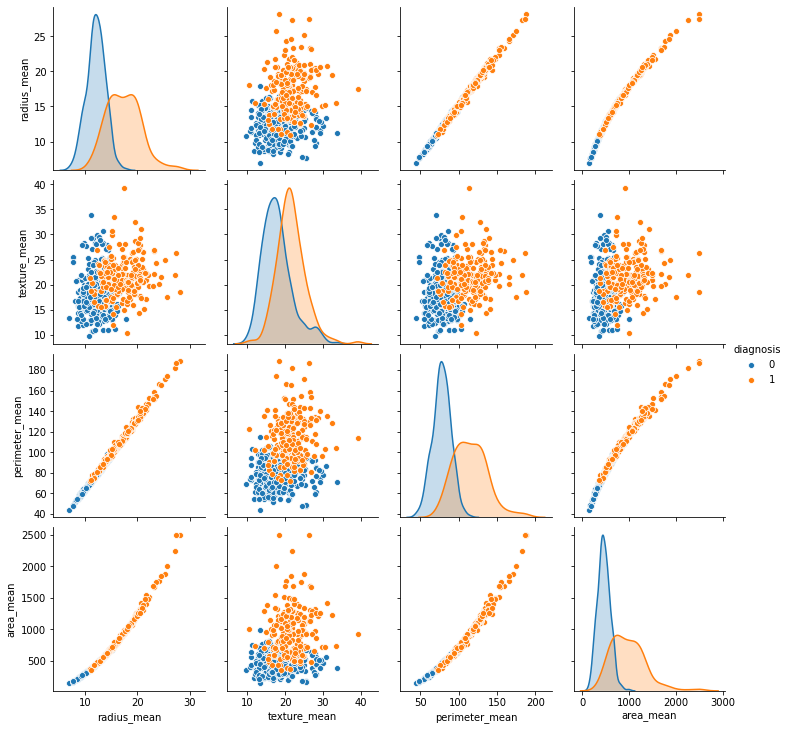

In [ ]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:6], hue="diagnosis")

In [ ]:
#Print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Get the correlation of the columns
df.iloc[:,1:].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


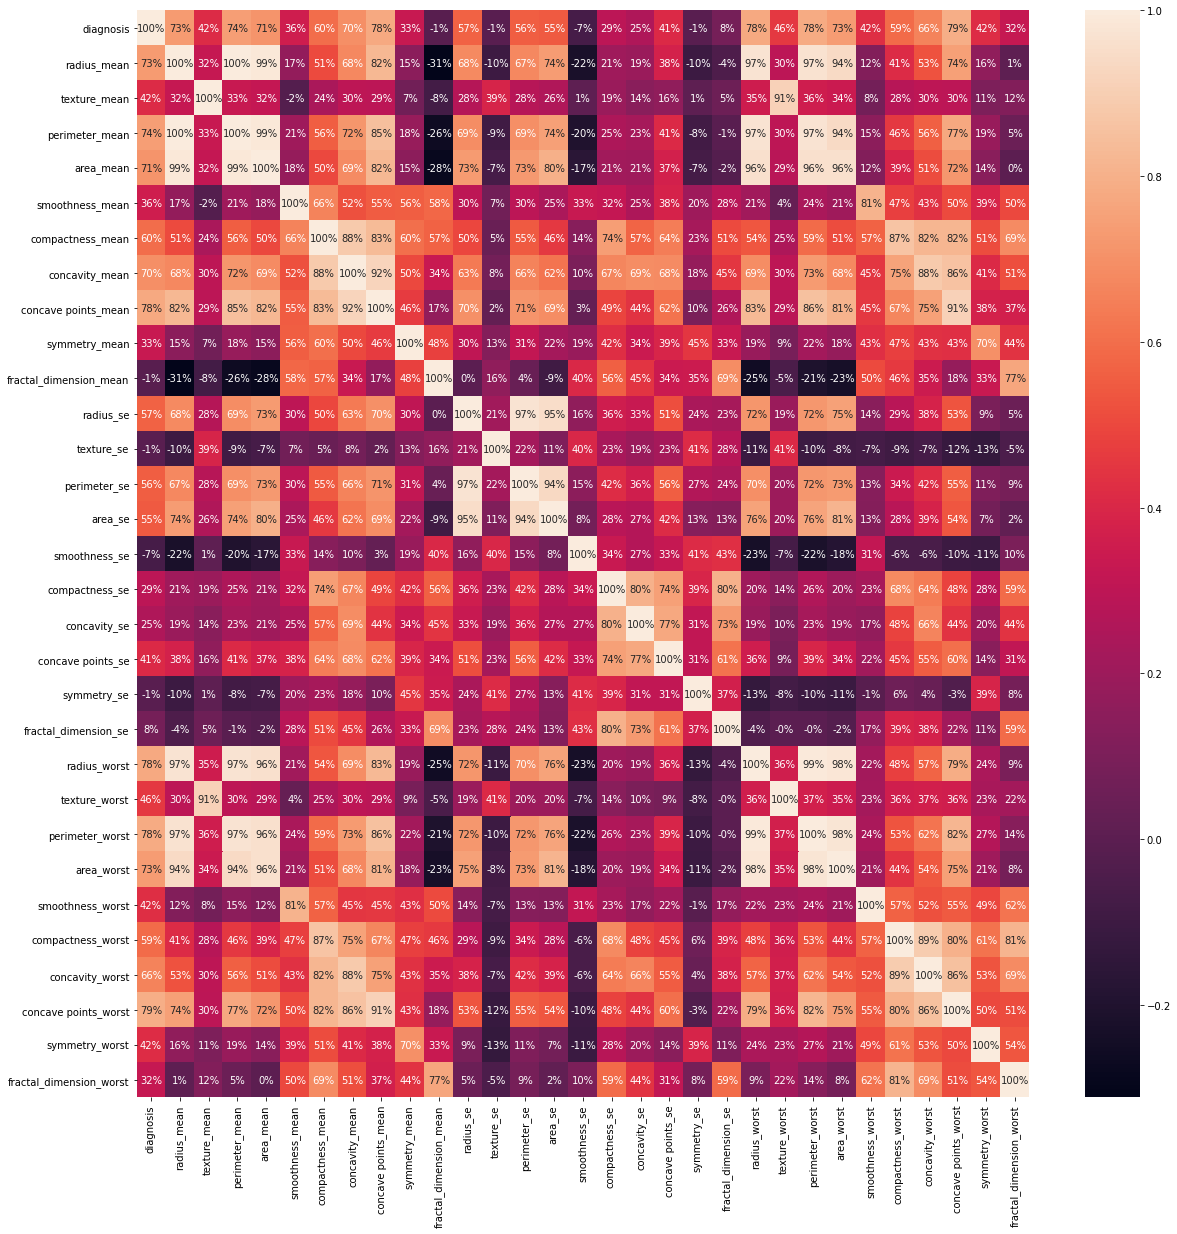

In [ ]:
#Visualize the correlation 
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt = ".0%" )

In [ ]:
#Split the dataset into independent (X) and dependent Y) datasets
X = df.iloc[:, 2:].values #Features
Y = df.iloc[:, 1].values #Labels

In [ ]:
#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train_unscaled, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

X_train_unscaled

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
        7.007e-02],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
        6.522e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [ ]:
#Scale the data (Featuring Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.fit_transform(X_test)

In [ ]:
#Create a function for the models
def models(X_train, Y_train):

  #Logisitic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy: ', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))

  return log, tree, forest

In [ ]:
#Getting all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.9906103286384976
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  0.9976525821596244


In [ ]:
#Test model accuracy test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range (len(model)):
  (tn, fp, fn, tp) = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  
  print("")
  print("Model", i)

  print('True Negative: ', tn)
  print('True Positive: ', tp)
  print('False Negative: ', fn)
  print('False Positive: ', fp)

  print("Testing Accuracy = ", (((tp + tn)/(tp + tn + fn + fp))*100), "%")
  print("")


Model 0
True Negative:  86
True Positive:  51
False Negative:  2
False Positive:  4
Testing Accuracy =  95.8041958041958 %


Model 1
True Negative:  85
True Positive:  50
False Negative:  3
False Positive:  5
Testing Accuracy =  94.4055944055944 %


Model 2
True Negative:  88
True Positive:  52
False Negative:  1
False Positive:  2
Testing Accuracy =  97.9020979020979 %



In [ ]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print("")
  print("")
  print("Model", i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print("")
  print("")



Model 0
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958




Model 1
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441




Model 2
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
wei

In [ ]:
#Print the prediction of each model
for i in range (len(model)):
  print("")
  print("")
  print("Model:", i)
  pred = model[i].predict(X_test)
  print("Prediciton:")
  print(pred)
  print("")
  print("Actual Result:")
  print(Y_test)
  print("")
  print("")



Model: 0
Prediciton:
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Actual Result:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]




Model: 1
Prediciton:
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]

Actual Result:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 

In [ ]:
#Input own data
df_user = df.iloc[:,2:]
feature_columns = df_user.columns

user_data_unscaled = []

for feature in feature_columns:
  print(feature,":")
  data = input()
  user_data_unscaled.append(data)

radius_mean :
11.34
texture_mean :
21.26
perimeter_mean :
72.48
area_mean :
396.5
smoothness_mean :
0.08759
compactness_mean :
0.06575
concavity_mean :
0.05133
concave points_mean :
0.01899
symmetry_mean :
0.1487
fractal_dimension_mean :
0.06529
radius_se :
0.2344
texture_se :
0.9861
perimeter_se :
1.597
area_se :
16.41
smoothness_se :
0.009113
compactness_se :
0.01557
concavity_se :
0.02443
concave points_se :
0.006435
symmetry_se :
0.01568
fractal_dimension_se :
0.002477
radius_worst :
13.01
texture_worst :
29.15
perimeter_worst :
83.99
area_worst :
518.1
smoothness_worst :
0.1699
compactness_worst :
0.2196
concavity_worst :
0.312
concave points_worst :
0.08278
symmetry_worst :
0.2829
fractal_dimension_worst :
0.08832


In [ ]:
#Add user_data_unscaled to X_train_unscaled to form Y
#X_train_unscaled.shape
#user_data_unscaled = [np.zeros((30,))]
user_data_unscaled = [user_data_unscaled]

Y = np.append(X_train_unscaled, user_data_unscaled, axis = 0)
Y

array([['11.85', '17.46', '75.54', ..., '0.0914', '0.3101',
        '0.07007000000000001'],
       ['11.22', '19.86', '71.94', ..., '0.02022', '0.3292', '0.06522'],
       ['20.13', '28.25', '131.2', ..., '0.1628', '0.2572', '0.06637'],
       ...,
       ['9.72', '18.22', '60.73', ..., '0.0', '0.1909', '0.06559'],
       ['11.51', '23.93', '74.52', ..., '0.09652999999999999', '0.2112',
        '0.08732000000000001'],
       ['11.34', '21.26', '72.48', ..., '0.08278', '0.2829', '0.08832']],
      dtype='<U32')

In [ ]:
#Extract the user's data from Y
Y_scaled = sc.fit_transform(Y)
Z = Y_scaled[-1]
Z

array([-0.79301664,  0.4915385 , -0.80405952, -0.72623575, -0.63312554,
       -0.7476814 , -0.47518535, -0.77624807, -1.14559376,  0.39002017,
       -0.59312148, -0.41389257, -0.60312163, -0.50042968,  0.75174599,
       -0.56001547, -0.23113524, -0.88988427, -0.57968409, -0.46969196,
       -0.67521664,  0.57886846, -0.69059355, -0.62995626,  1.62581347,
       -0.21879353,  0.21434314, -0.49513485, -0.10663691,  0.26857467])

In [ ]:
#Convert Z from a numpy array to a 2D list
Z = Z.tolist()
Z = [Z]
Z

[[-0.7930166366218299,
  0.4915384976035578,
  -0.8040595201688738,
  -0.7262357505910716,
  -0.6331255366780983,
  -0.7476813955103149,
  -0.4751853511572968,
  -0.7762480735987227,
  -1.1455937626002648,
  0.3900201688811846,
  -0.5931214839980018,
  -0.4138925684717205,
  -0.6031216280656365,
  -0.500429681283596,
  0.7517459908702333,
  -0.5600154730045558,
  -0.23113524012972414,
  -0.8898842662401343,
  -0.5796840926863221,
  -0.4696919585283127,
  -0.6752166391765129,
  0.5788684579969566,
  -0.6905935494947733,
  -0.6299562623362838,
  1.6258134709679197,
  -0.21879353206778626,
  0.2143431449003745,
  -0.4951348544458642,
  -0.10663690897288232,
  0.2685746741675518]]

In [ ]:
#Final output
for i in range (len(model)):
  print("")
  print("Model:", i)
  pred = model[i].predict(Z)
  print("Prediciton:")
  if pred[0] == "1":
    print("Malignant")
  else:
    print("Benign")
  print("")


Model: 0
Prediciton:
Benign


Model: 1
Prediciton:
Benign


Model: 2
Prediciton:
Benign

